<a href="https://colab.research.google.com/github/Chirag314/Bagging-regressor-housingdata/blob/main/Bagging_regressor_housingdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###This notebook is copied from exercises from book Ensemble Machine Learning Cookbook.

In [1]:
#import required libraries
import warnings
warnings.filterwarnings('ignore')
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils import resample
import matplotlib.pyplot as plt

In [2]:
# Read data from github. Use raw format and copy url# Note normal url and raw url will be different.
import pandas as pd
pd.options.display.max_rows=None
pd.options.display.max_columns=None
url = 'https://raw.githubusercontent.com/PacktPublishing/Ensemble-Machine-Learning-Cookbook/master/Chapter05/bostonhousing.csv'
df_housingdata = pd.read_csv(url)
#df = pd.read_csv(url)
print(df_housingdata.head(5))

   ID     crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0   1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1   2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2   4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
3   5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
4   7  0.08829  12.5   7.87     0  0.524  6.012  66.6  5.5605    5  311   

   ptratio   black  lstat  medv  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     18.7  394.63   2.94  33.4  
3     18.7  396.90   5.33  36.2  
4     15.2  395.60  12.43  22.9  


In [3]:
df_housingdata.shape

(333, 15)

In [4]:
df_housingdata.dtypes
#df_backorder.describe()

ID           int64
crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [5]:
# check missing values
df_housingdata.isnull().sum()
columns_with_missing_values=df_housingdata.columns[df_housingdata.isnull().any()]
df_housingdata[columns_with_missing_values].isnull().sum()

Series([], dtype: float64)

#####WWe notice that there are no missing values in wine data

In [6]:
#We separate our features and the response set. We also split our data into training and testing subsets.
X=df_housingdata.iloc[:,1:14]
Y=df_housingdata.iloc[:,-1]

X_train,X_test, Y_train, Y_test=train_test_split(X,Y , random_state=1)

In [14]:
#We create an instance of the DecisionTreeClassifier class and pass it to the BaggingClassifier():
#Note that in the preceding code block, we have declared bootstrap=True. This is the default value and indicates that samples are drawn with replacement
dt_model=DecisionTreeRegressor()
bag_dt_model=BaggingRegressor(dt_model,max_features=1.0,n_estimators=5, random_state=1,bootstrap=True)

In [8]:
# Fit the model
bag_dt_model.fit(X_train, Y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=5,
                 random_state=1)

In [9]:
# Check the score after passing test data
bag_dt_model.score(X_test,Y_test)

0.7239065279743389

In [10]:
#We use the predict function to predict the response variable as follows:
predictedvalues=bag_dt_model.predict(X_test)

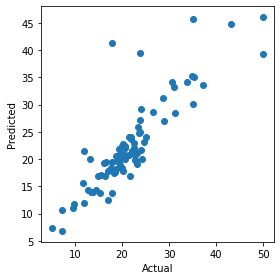

In [12]:
# We can plot the actuals and the predicted values
plt.figure(figsize=(4,4))
plt.scatter(Y_test, predictedvalues)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.tight_layout()

In [19]:
#We now change the n_estimators parameter to 30 in the following code and re-execute the steps 
bag_dt_model=BaggingRegressor(dt_model, max_features=1.0,n_estimators=30,bootstrap=True, random_state=1)
# Fit the model
bag_dt_model.fit(X_train, Y_train)
# Check the score after passing test data
bag_dt_model.score(X_test,Y_test)
#We use the predict function to predict the response variable as follows:
predictedvalues=bag_dt_model.predict(X_test)

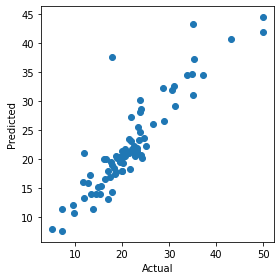

In [20]:
# We can plot the actuals and the predicted values
plt.figure(figsize=(4,4))
plt.scatter(Y_test, predictedvalues)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.tight_layout()

In [ ]:
#We will now use a code to plot the confusion matrix.
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks, classes,rotation=45)
  plt.yticks(tick_marks, classes)

  thresh=cm.max()
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i ,cm[i,j],horizontalalighment='center',
             color='white' if cm[i,j]>thresh else 'black')
    
    plt.tight_layout()
    plt.ylabel('Actuals')
    plt.xlabel('Predicted')

In [ ]:
# This  variable holds class labels of our target
target_names=['1','2','3']
import itertools
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test, predictedvalues)

# Plotting the confusion matriz
plt.figure(figsize=(3,3))
plot_confusion_matrix(cm=cm,classes=target_names,normalize=False)
plt.show()


TypeError: ignored

<Figure size 216x216 with 0 Axes>

In [ ]:
#We start by creating the bootstrap samples
def create_bootstrap_oob(df):
  global df_oob
  global df_bootstrap_sample
  #Creating bootstrap sample
  df_bootstrap_sample=resample(df,replace=True,n_samples=100)
  #creating oob sample
  bootstrap_sample_index=tuple(df_bootstrap_sample.index)
  bootstrap_df=df.index.isin(bootstrap_sample_index)
  df_oob=df[~bootstrap_df]

We build models using the bootstrap samples and average the cost function across all the models. We use the SGDRegressor() on each bootstrap sample. In the following code block, we reuse our previously written custom function, create_bootstrap_oob(), to create the bootstrap and OOB error samples:

In [ ]:
iteration=50
mse_each_iteration=list()
lm=SGDRegressor()
total_mse=0
average_mse=list()

for i in range(iteration):
  create_bootstrap_oob(df_winedata)

  #bootstrap sample features set
  x_bs=df_bootstrap_sample.iloc[:,1:8]
  #Bootstrap sample response variable
  y_bs=df_bootstrap_sample.iloc[:,0]

  #oob sample features set
  x_oob=df_oob.iloc[:,1:8]
  #OB sample response variable
  y_oob=df_oob.iloc[:,0]

  # fit your model with bootstrap sample
  lm=SGDRegressor()
  lm.fit(x_bs,y_bs)

  #test your model on out of bag sample
  predictedvalues=lm.predict(x_oob)

  #capture mse for the predicted values
  mse=mean_squared_error(y_oob,predictedvalues)

  #create a list of mse values
  mse_each_iteration.append(mse)

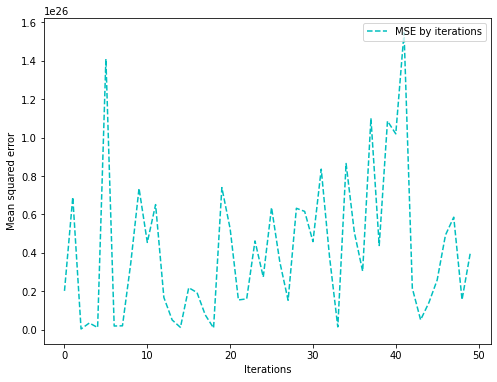

In [ ]:
#Plot mse for each model built
import matplotlib.pyplot as plt
f, ax=plt.subplots(figsize=(8,6))

plt.plot(mse_each_iteration,'c--',label='MSE by iterations')

plt.xlabel('Iterations')
plt.ylabel('Mean squared error')
plt.legend(loc=1)
plt.show()

In [ ]:
# We can also gridsearchcv

from sklearn.model_selection import GridSearchCV
param_values={'n_estimators':[10,20,25,30],'base_estimator__max_leaf_nodes':[5,10,15,20],'base_estimator__max_depth':[3,4,5]}

In [ ]:
# Instantiate the classifier
dt_model=DecisionTreeClassifier()
bag_dt_model_grid=BaggingClassifier(base_estimator=dt_model,oob_score=True,random_state=1)

In [ ]:
# We use GridSearchCV to determine the best parameters
bc_grid=GridSearchCV(estimator=bag_dt_model,param_grid=param_values,cv=20,n_jobs=-1)
bc_grid.fit(X_train, Y_train)
best_params=bc_grid.best_params_
print(best_params)

{'base_estimator__max_depth': 3, 'base_estimator__max_leaf_nodes': 10, 'n_estimators': 25}


In [ ]:
best_dt_model=DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=10,max_depth=3)
final_bag_dt_model=BaggingClassifier(base_estimator=best_dt_model,n_estimators=150,bootstrap=True,random_state=1,oob_score=True)

In [ ]:
# Check accuracy of our OOB sample
final_bag_dt_model.fit(X_train,Y_train)
bag_predictedvalues=final_bag_dt_model.predict(X_test)

# See the OOB accuracy
acc_oob=final_bag_dt_model.oob_score_
print(acc_oob)

0.946969696969697
